In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 53.0 MB/s 
     |████████████████████████████████| 11.1 MB 5.6 MB/s 
     |████████████████████████████████| 596 kB 57.5 MB/s 
     |████████████████████████████████| 102 kB 68.3 MB/s 
     |████████████████████████████████| 690 kB 44.1 MB/s 
     |████████████████████████████████| 4.7 MB 42.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 47.6 MB/s 
     |████████████████████████████████| 38.1 MB 196 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=67b27d36259aecf7831717f09efe49f08c0d4882f52cd0bd871f8f00d7e4cad8
  Stored in directory: /tmp/pip-ephem-wheel-cache-1qfrcqz8/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=2709

In [ ]:


from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Dataset/Trafic.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Dataset/Test/TrafficTest.csv')
df_trainkdd = pd.read_csv('/content/drive/MyDrive/KDD/KDDTrain+.csv')
df_testkdd = pd.read_csv('/content/drive/MyDrive/KDD/KDDTest+.csv')

In [ ]:
df_train.info()

# Dataset оптимизация

In [ ]:
df_trainkdd.columns

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31673 entries, 0 to 31672
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_ip             31673 non-null  object 
 1   dst_ip             31673 non-null  object 
 2   src_port           31673 non-null  int64  
 3   dst_port           31673 non-null  int64  
 4   src_mac            31673 non-null  object 
 5   dst_mac            31673 non-null  object 
 6   protocol           31673 non-null  int64  
 7   timestamp          31673 non-null  object 
 8   flow_duration      31673 non-null  float64
 9   flow_byts_s        31673 non-null  float64
 10  flow_pkts_s        31673 non-null  float64
 11  fwd_pkts_s         31673 non-null  float64
 12  bwd_pkts_s         31673 non-null  float64
 13  tot_fwd_pkts       31673 non-null  int64  
 14  tot_bwd_pkts       31673 non-null  int64  
 15  totlen_fwd_pkts    31673 non-null  int64  
 16  totlen_bwd_pkts    316

In [ ]:
df_train.columns 

In [ ]:
df_train['label'].value_counts()


SAFE      15532
XSS        8458
BRUTE      3873
SQLINJ     3810
Name: label, dtype: int64

In [ ]:
df_test['label'].value_counts()

SQLINJ    1683
XSS       1293
BRUTE     1253
SAFE       460
Name: label, dtype: int64

In [ ]:
dropFeatures = ['src_ip','dst_ip', 'src_port', 'dst_port', 'src_mac', 'dst_mac', 'protocol', 'timestamp','fwd_blk_rate_avg']


In [ ]:
#fwd_byts_b_avg, fwd_pkts_b_avg
#idle_std,idle_mean, idle_min, idle_max
#fwd_iat_std, fwd_iat_mean, fwd_iat_max, flow_iat_mean, flow_iat_max, fwd_iat_max
#totlen_fwd_pkts,flow_duration, tot_fwd_pkts, fwd_act_data_pkts, fwd_iat_tot
#flow_byts_s,flow_pkts_s,fwd_pkts_s
#pkt_len_std, fwd_prk_len_max,fwd_pkt_len_mean,pkt_len_max,pkt_len_std,pkt_len_var,pkt_size_avg
#totlen_fwd_pkts,fwd_header_len
#pkt_len_min,fwd_pkt_len_min
#fwd_pkt_len_mean,pkt_len_mean
#flow_iat_min,fwd_iat_min
#active_std,active_max
drop = ['fwd_pkts_b_avg','idle_std','idle_mean', 'idle_min',
        'fwd_iat_std', 'fwd_iat_mean','flow_iat_mean', 
        'flow_iat_max', 'fwd_iat_max','flow_duration',
        'tot_fwd_pkts', 'fwd_act_data_pkts','fwd_iat_tot',
        'flow_byts_s','flow_pkts_s','pkt_len_max','pkt_len_std','pkt_len_var','pkt_size_avg',
        'pkt_len_std', 'fwd_pkt_len_max','totlen_fwd_pkts','pkt_len_min','fwd_pkt_len_mean','fwd_iat_min','active_std','init_fwd_win_byts']

In [ ]:
df_train = df_train.drop(columns=dropFeatures)
df_test = df_test.drop(columns=dropFeatures)


In [ ]:
df_train = df_train.drop(columns=drop)
df_test = df_test.drop(columns=drop)

In [ ]:
df_train.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

In [ ]:
len(df_train['bwd_pkts_s'].value_counts())

1

In [ ]:
for i in df_train.columns:
  if (len(df_train['{0}'.format(i)].value_counts()) == 1):
    df_train = df_train.drop(columns= ['{0}'.format(i)] , axis=1) 
    df_test = df_test.drop(columns= ['{0}'.format(i)] , axis=1) 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31673 entries, 0 to 31672
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flow_byts_s        31673 non-null  float64
 1   flow_pkts_s        31673 non-null  float64
 2   fwd_pkts_s         31673 non-null  float64
 3   totlen_fwd_pkts    31673 non-null  int64  
 4   fwd_pkt_len_max    31673 non-null  float64
 5   fwd_pkt_len_min    31673 non-null  float64
 6   fwd_pkt_len_mean   31673 non-null  float64
 7   fwd_pkt_len_std    31673 non-null  float64
 8   pkt_len_max        31673 non-null  int64  
 9   pkt_len_min        31673 non-null  int64  
 10  pkt_len_mean       31673 non-null  float64
 11  pkt_len_std        31673 non-null  float64
 12  pkt_len_var        31673 non-null  float64
 13  fwd_header_len     31673 non-null  int64  
 14  flow_iat_min       31673 non-null  float64
 15  flow_iat_std       31673 non-null  float64
 16  fwd_iat_min        316

In [ ]:
df_train.to_csv('df_train.csv',index=False)

In [ ]:
df_test.to_csv('df_test.csv',index=False)

In [ ]:
profile = df_train.profile_report(title='Pandas Profiling Report',minimal=True, progress_bar=True, correlations={"pearson": {"calculate": True}})

In [ ]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_test.info()

In [ ]:
x_train = df_train.drop(columns='label')
y_train = df_train['label']
x_test = df_test.drop(columns='label')
y_test = df_test['label']
x_trainkdd = df_trainkdd.drop(columns='class')
y_trainkdd = df_trainkdd['class']
x_testkdd = df_testkdd.drop(columns='class')
y_testkdd = df_testkdd['class']
y_train = y_train.apply(lambda x: 0 if x == 'SAFE' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'SAFE' else 1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametrs = { 'n_estimators': range (1, 61, 10),
              'max_depth': range (1, 21, 4),
              'min_samples_leaf': range (1, 11, 1),
              'min_samples_split': range (2, 11, 2)}

In [ ]:
df_train.info()

In [ ]:
modelRF = RandomForestClassifier()

In [ ]:
modelRF.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
featuresImportance = modelRF.feature_importances_

In [ ]:
sorted_idx = np.flip(featuresImportance.argsort())

In [ ]:
for i in sorted_idx[0:40]:
    print('{} - {}'.format(featuresImportance[i], x_train.columns[i]))
    #active_std,active_max

0.22391924747822325 - fwd_header_len
0.21470461490769707 - fwd_pkts_s
0.2021885504471468 - pkt_len_mean
0.19478257729243162 - flow_iat_std
0.10242859126364275 - idle_max
0.03907054721027356 - fwd_pkt_len_std
0.009387583867614444 - flow_iat_min
0.007641703307272805 - init_fwd_win_byts
0.0015446283658745058 - active_min
0.0015429096118418607 - active_mean
0.0013589615599617169 - fwd_pkt_len_min
0.0007780584889332962 - active_max
0.0006520261990863288 - fwd_byts_b_avg


In [ ]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=24)

In [ ]:
grid = GridSearchCV(modelRF, parametrs, cv = 5 , return_train_score=True)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 21, 4),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11, 2),
                         'n_estimators': range(1, 61, 10)},
             return_train_score=True)

In [ ]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1}

In [ ]:
df_test['label'].value_counts()

SQLINJ    1683
XSS       1293
BRUTE     1253
SAFE       460
Name: label, dtype: int64

In [ ]:
features_x = x_train.columns

In [ ]:
x_train.info()

In [ ]:
y_train

0        SAFE
1        SAFE
2        SAFE
3        SAFE
4        SAFE
         ... 
31668     XSS
31669     XSS
31670     XSS
31671     XSS
31672     XSS
Name: label, Length: 31673, dtype: object

K-Means


# Классификация

## RandomForestClassifier important features CIC

In [ ]:
df_cic = pd.read_csv('/content/drive/MyDrive/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',encoding='cp1252')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,6,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_cic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458968 entries, 0 to 458967
Data columns (total 85 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   flow_id               170366 non-null  object 
 1   src_ip                170366 non-null  object 
 2   dst_ip                170366 non-null  float64
 3   src_port              170366 non-null  object 
 4   dst_port              170366 non-null  float64
 5   protocol              170366 non-null  float64
 6   timestamp             170366 non-null  object 
 7   flow_duration         170366 non-null  float64
 8   tot_fwd_pkts          170366 non-null  float64
 9   tot_bwd_pkts          170366 non-null  float64
 10  totlen_fwd_pkts       170366 non-null  float64
 11  totlen_bwd_pkts       170366 non-null  float64
 12  fwd_pkt_len_max       170366 non-null  float64
 13  fwd_pkt_len_min       170366 non-null  float64
 14  fwd_pkt_len_mean      170366 non-null  float64
 15  

In [ ]:
df_cic = df_cic.drop(df_cic[pd.isnull(df_cic['src_ip'])].index)

In [ ]:
df_cic.head()

,flow_id,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,192.168.10.3-192.168.10.50-389-33898-6,192.168.10.50,33898.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113095465.0,48.0,24.0,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,192.168.10.3-192.168.10.50-389-33904-6,192.168.10.50,33904.0,192.168.10.3,389.0,6.0,6/7/2017 8:59,113473706.0,68.0,40.0,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0.0,8.0.6.4,0.0,0.0,6/7/2017 8:59,119945515.0,150.0,0.0,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,192.168.10.14-65.55.44.109-59135-443-6,192.168.10.14,59135.0,65.55.44.109,443.0,6.0,6/7/2017 8:59,60261928.0,9.0,7.0,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.14-53-59555-17,192.168.10.14,59555.0,192.168.10.3,53.0,17.0,6/7/2017 8:59,269.0,2.0,2.0,...,32.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [ ]:
df_cic.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

In [ ]:
benign_total = len(df_cic[df_cic['label'] == "BENIGN"])
benign_total

168186

In [ ]:
attack_total = len(df_cic[df_cic['label'] != "BENIGN"])
attack_total

2180

In [ ]:
enlargement = 1.1
benign_included_max = attack_total / 30 * 70
benign_inc_probability = (benign_included_max / benign_total) * enlargement
print(benign_included_max, benign_inc_probability)

5086.666666666667 0.03326872232726466


In [ ]:
import random
indexes = []
benign_included_count = 0
for index, row in df_cic.iterrows():
    if (row['label'] != "BENIGN"):
        indexes.append(index)
    else:
        # Copying with benign_inc_probability
        if random.random() > benign_inc_probability: continue
        # Have we achieved 70% (5087 records)?
        if benign_included_count > benign_included_max: continue
        benign_included_count += 1
        indexes.append(index)
df_cic = df_cic.loc[indexes]

In [ ]:
df_cic['label'].value_counts()

BENIGN                        5087
Web Attack – Brute Force      1507
Web Attack – XSS               652
Web Attack – Sql Injection      21
Name: label, dtype: int64

In [ ]:
df_cic['label'] = df_cic['label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [ ]:
excluded = ['flow_id', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol', 'timestamp',"CWE Flag Count","Subflow Fwd Bytes","Subflow Bwd Packets","Subflow Bwd Bytes","Avg Bwd Segment Size","Average Packet Size","Fwd Header Length","act_data_pkt_fwd"]
df_cic = df_cic.drop(columns=excluded)

In [ ]:
df_cic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7267 entries, 100 to 156412
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flow_duration      7267 non-null   float64
 1   tot_fwd_pkts       7267 non-null   float64
 2   tot_bwd_pkts       7267 non-null   float64
 3   totlen_fwd_pkts    7267 non-null   float64
 4   totlen_bwd_pkts    7267 non-null   float64
 5   fwd_pkt_len_max    7267 non-null   float64
 6   fwd_pkt_len_min    7267 non-null   float64
 7   fwd_pkt_len_mean   7267 non-null   float64
 8   fwd_pkt_len_std    7267 non-null   float64
 9   bwd_pkt_len_max    7267 non-null   float64
 10  bwd_pkt_len_min    7267 non-null   float64
 11  bwd_pkt_len_mean   7267 non-null   float64
 12  bwd_pkt_len_std    7267 non-null   float64
 13  flow_byts_s        7267 non-null   float64
 14  flow_pkts_s        7267 non-null   float64
 15  flow_iat_mean      7267 non-null   float64
 16  flow_iat_std       7

In [ ]:
excluded = ['bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags',
            'fwd_byts_b_avg', 'fwd_pkts_b_avg', 'fwd_blk_rate_avg',
            'bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','tot_bwd_pkts',
            'totlen_bwd_pkts', 'fwd_header_len', 'bwd_header_len', 'fwd_act_data_pkts',
            'fwd_pkt_len_std', 'bwd_pkt_len_std', 'bwd_pkt_len_max', 'pkt_len_std',
            'totlen_fwd_pkts','init_bwd_win_byts','init_fwd_win_byts',
            'idle_min', 'idle_max', 'idle_mean',
            'pkt_len_var', 'pkt_len_mean','active_mean']
df_cic = df_cic.drop(columns=excluded)


In [ ]:
df_cic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7267 entries, 7 to 154196
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flow_duration     7267 non-null   float64
 1   tot_fwd_pkts      7267 non-null   float64
 2   fwd_pkt_len_max   7267 non-null   float64
 3   fwd_pkt_len_min   7267 non-null   float64
 4   fwd_pkt_len_mean  7267 non-null   float64
 5   bwd_pkt_len_min   7267 non-null   float64
 6   bwd_pkt_len_mean  7267 non-null   float64
 7   flow_byts_s       7267 non-null   float64
 8   flow_pkts_s       7267 non-null   float64
 9   flow_iat_mean     7267 non-null   float64
 10  flow_iat_std      7267 non-null   float64
 11  flow_iat_max      7267 non-null   float64
 12  flow_iat_min      7267 non-null   float64
 13  fwd_iat_tot       7267 non-null   float64
 14  fwd_iat_mean      7267 non-null   float64
 15  fwd_iat_std       7267 non-null   float64
 16  fwd_iat_max       7267 non-null   float6

In [ ]:
#profile = df_cic.profile_report(title='Pandas Profiling Report',minimal=True, progress_bar=True, correlations={"pearson": {"calculate": True}})

AttributeError: ignored

In [ ]:
#profile.to_file("your_report.html")

In [ ]:
features = df_cic.columns

In [ ]:
df_cic.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7267 entries, 100 to 156412
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flow_duration     7267 non-null   float64
 1   tot_fwd_pkts      7267 non-null   float64
 2   fwd_pkt_len_max   7267 non-null   float64
 3   fwd_pkt_len_min   7267 non-null   float64
 4   fwd_pkt_len_mean  7267 non-null   float64
 5   bwd_pkt_len_min   7267 non-null   float64
 6   bwd_pkt_len_mean  7267 non-null   float64
 7   flow_byts_s       7267 non-null   float64
 8   flow_pkts_s       7267 non-null   float64
 9   flow_iat_mean     7267 non-null   float64
 10  flow_iat_std      7267 non-null   float64
 11  flow_iat_max      7267 non-null   float64
 12  flow_iat_min      7267 non-null   float64
 13  fwd_iat_tot       7267 non-null   float64
 14  fwd_iat_mean      7267 non-null   float64
 15  fwd_iat_std       7267 non-null   float64
 16  fwd_iat_max       7267 non-null   floa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
df_cic.to_csv('df_traincic.csv')

In [ ]:
df_cicMy = df_train[features]

In [ ]:
x_cic = df_cic.drop(columns='label')
y_cic = df_cic['label']

In [ ]:
df_cicMy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31673 entries, 0 to 31672
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flow_duration     31673 non-null  float64
 1   tot_fwd_pkts      31673 non-null  int64  
 2   fwd_pkt_len_max   31673 non-null  float64
 3   fwd_pkt_len_min   31673 non-null  float64
 4   fwd_pkt_len_mean  31673 non-null  float64
 5   bwd_pkt_len_min   31673 non-null  float64
 6   bwd_pkt_len_mean  31673 non-null  float64
 7   flow_byts_s       31673 non-null  float64
 8   flow_pkts_s       31673 non-null  float64
 9   flow_iat_mean     31673 non-null  float64
 10  flow_iat_std      31673 non-null  float64
 11  flow_iat_max      31673 non-null  float64
 12  flow_iat_min      31673 non-null  float64
 13  fwd_iat_tot       31673 non-null  float64
 14  fwd_iat_mean      31673 non-null  float64
 15  fwd_iat_std       31673 non-null  float64
 16  fwd_iat_max       31673 non-null  float6

In [ ]:
y_cic.head()

100    0
112    0
121    0
147    0
214    0
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_traincic, x_testcic, y_traincic, y_testcic = train_test_split(x_cic, y_cic, test_size=0.3, random_state=42)

In [ ]:
parametrs = { 'n_estimators': range (1, 61, 10),
              'max_depth': range (1, 21, 4),
              'min_samples_leaf': range (1, 11, 1),
              'min_samples_split': range (2, 11, 2)}

In [ ]:
modelRFcic = RandomForestClassifier(min_samples_split=2)

In [ ]:
grid = GridSearchCV(modelRFcic, parametrs, cv = 5 , return_train_score=True)
grid.fit(x_cic, y_cic)

In [ ]:
for i in df_cic.columns:
  if(df_cic['{0}'.format(i)].isnull().all()):
    print(df_cic['{0}'.format(i)].isnull())

In [ ]:
modelRFcic = RandomForestClassifier(max_depth= 5, min_samples_leaf = 3, min_samples_split = 9, n_estimators = 41)

In [ ]:
modelRFcic.fit(x_traincic, y_traincic)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=41)

<BarContainer object of 42 artists>

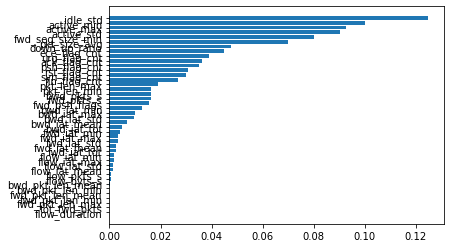

In [ ]:
plt.barh(x_traincic.columns, sorted(modelRFcic.feature_importances_))

In [ ]:
y_predcic = modelRFcic.predict(x_testcic)

In [ ]:
x_testcic.info()

In [ ]:
accuracy = accuracy_score(y_testcic, y_predcic)
precision = precision_score(y_testcic, y_predcic)
recall = recall_score(y_testcic, y_predcic)
f1 = f1_score(y_testcic, y_predcic)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.9651535992663915
Precision = 0.9830508474576272
Recall = 0.8978328173374613
F1 = 0.9385113268608414


In [ ]:
featuresImportancecic = modelRFcic.feature_importances_

In [ ]:
featuresImportancecic

array([3.22548484e-02, 2.24248614e-02, 8.28012916e-02, 5.36554546e-03,
       6.64556888e-02, 3.41002697e-03, 4.62000171e-03, 4.39968932e-02,
       3.11738339e-02, 3.17344933e-02, 1.41422181e-02, 3.14371677e-02,
       9.74290028e-03, 3.56514360e-02, 2.76508098e-02, 5.97357743e-02,
       2.70590949e-02, 4.89369788e-02, 3.45269237e-03, 7.32520617e-03,
       4.69975632e-03, 6.09493551e-03, 7.01477758e-03, 0.00000000e+00,
       5.27937283e-02, 1.49570153e-02, 1.50525028e-03, 9.12847061e-02,
       5.00141832e-02, 7.16704822e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.85982998e-02, 8.09483534e-03, 4.09704001e-03,
       0.00000000e+00, 4.65474535e-03, 9.72700204e-02, 9.77156374e-03,
       4.88618386e-03, 4.72937366e-06, 1.11567551e-03, 5.26550077e-03,
       5.48215359e-03, 1.01473178e-04, 2.73629841e-03, 3.01831675e-03])

In [ ]:
sorted_idx = np.flip(featuresImportancecic.argsort())

In [ ]:
sorted_idx

array([38, 27,  2,  4, 15, 24, 28, 17,  7, 13,  0,  9, 11,  8, 33, 14, 16,
        1, 25, 10, 39, 12, 34, 19, 29, 22, 21, 44,  3, 43, 40, 20, 37,  6,
       35, 18,  5, 47, 46, 26, 42, 45, 41, 30, 31, 32, 36, 23])

In [ ]:
for i in sorted_idx:
    print('{} - {}'.format(featuresImportancecic[i], x_traincic.columns[i]))

0.09727002039577863 - pkt_size_avg
0.09128470610440609 - pkt_len_max
0.08280129157070365 - fwd_pkt_len_max
0.0664556887747947 - fwd_pkt_len_mean
0.05973577427243844 - fwd_iat_std
0.052793728292304415 - fwd_pkts_s
0.05001418320457957 - pkt_len_mean
0.04893697878994773 - fwd_iat_min
0.04399689324096076 - flow_byts_s
0.035651435987707474 - fwd_iat_tot
0.03225484843025552 - flow_duration
0.03173449329743358 - flow_iat_mean
0.03143716765361279 - flow_iat_max
0.031173833890127588 - flow_pkts_s
0.028598299811764375 - psh_flag_cnt
0.027650809838949367 - fwd_iat_mean
0.027059094913757395 - fwd_iat_max
0.022424861381504888 - tot_fwd_pkts
0.014957015299440242 - bwd_pkts_s
0.014142218097749156 - flow_iat_std
0.00977156374097287 - fwd_seg_size_min
0.009742900279114296 - flow_iat_min
0.008094835337008064 - ack_flag_cnt
0.007325206168208972 - bwd_iat_mean
0.007167048219080401 - pkt_len_var
0.0070147775847282145 - bwd_iat_min
0.00609493551011846 - bwd_iat_max
0.005482153589463752 - idle_mean
0.0053655

In [ ]:
sorted_columns = sorted_idx[0:25]

In [ ]:
sorted_columns

array([56, 13, 35,  7, 47, 36, 48, 55, 52, 23,  5,  3, 15, 17, 19, 21, 14,
       57, 22, 32,  0, 31, 20, 30, 16])

<BarContainer object of 25 artists>

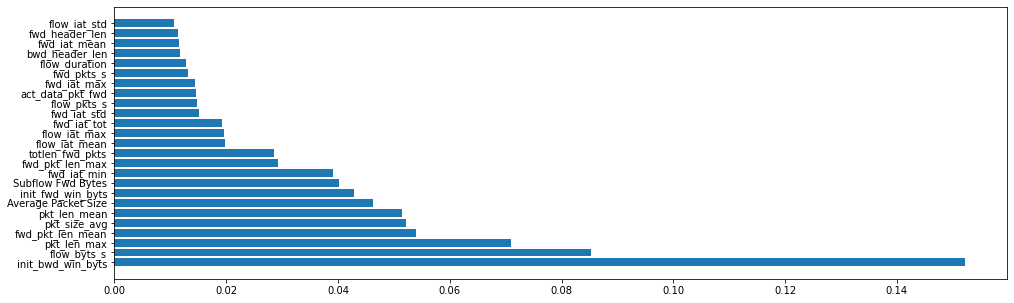

In [ ]:
plt.barh(x_traincic.columns[sorted_columns], featuresImportancecic[sorted_columns])

In [ ]:
features_importantcic = x_traincic.columns[sorted_idx]

In [ ]:
features_importantcic

## Cic проверка на реальном трафике


In [ ]:
x_cicmy = df_cicMy.drop(columns='label')
y_cicmy = df_cicMy['label']

In [ ]:
x_traincic

,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,...,idle_max,idle_min,idle_mean,idle_std,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg
28414,30561.0,3.533916e+03,65.442885,32.721442,32.721442,1.0,1.0,46.0,62.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148417,999603.0,1.200477e+01,2.000794,2.000794,0.000000,2.0,0.0,12.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127067,178.0,1.617978e+06,22471.910110,11235.955060,11235.955060,2.0,2.0,84.0,204.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97537,31091.0,7.654948e+03,128.654595,64.327297,64.327297,2.0,2.0,78.0,160.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23174,5233154.0,0.000000e+00,0.764357,0.573268,0.191089,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68152,5548264.0,2.162839e+00,0.720946,0.540710,0.180237,3.0,1.0,12.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92817,153.0,7.843137e+04,13071.895420,13071.895420,0.000000,2.0,0.0,12.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93689,30974.0,9.879254e+03,129.140569,64.570285,64.570285,2.0,2.0,64.0,242.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98751,157.0,1.350318e+06,25477.707010,12738.853500,12738.853500,2.0,2.0,90.0,122.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(features_x)

37

In [ ]:
x_traincic = x_traincic[features_x]
x_testcic = x_test[features_x]

In [ ]:
x_traincic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5086 entries, 28414 to 21636
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flow_duration      5086 non-null   float64
 1   flow_byts_s        5086 non-null   float64
 2   tot_fwd_pkts       5086 non-null   float64
 3   totlen_fwd_pkts    5086 non-null   float64
 4   fwd_pkt_len_max    5086 non-null   float64
 5   fwd_pkt_len_min    5086 non-null   float64
 6   fwd_pkt_len_mean   5086 non-null   float64
 7   fwd_pkt_len_std    5086 non-null   float64
 8   pkt_len_max        5086 non-null   float64
 9   pkt_len_min        5086 non-null   float64
 10  pkt_len_mean       5086 non-null   float64
 11  pkt_len_std        5086 non-null   float64
 12  pkt_len_var        5086 non-null   float64
 13  fwd_header_len     5086 non-null   float64
 14  fwd_act_data_pkts  5086 non-null   float64
 15  flow_iat_mean      5086 non-null   float64
 16  flow_iat_max       

In [ ]:
x_testcic.info()

In [ ]:
modelRFcic = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
modelRFcic.fit(x_traincic, y_traincic)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_predcic = modelRFcic.predict(x_cicmy)

In [ ]:
x_cicmy.info()

In [ ]:
y_cicmy = y_cicmy.apply(lambda x: 0 if x == 'SAFE' else 1)

In [ ]:
y_cicmy

0        0
1        0
2        0
3        0
4        0
        ..
31668    1
31669    1
31670    1
31671    1
31672    1
Name: label, Length: 31673, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_cicmy, y_predcic)

array([[15532,     0],
       [16141,     0]])

In [ ]:
import warnings
accuracy = accuracy_score(y_cicmy, y_predcic)
precision = precision_score(y_cicmy, y_predcic)
recall = recall_score(y_cicmy, y_predcic)
f1 = f1_score(y_cicmy, y_predcic, average='weighted', labels=np.unique(y_pred))
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.49038613329965586
Precision = 0.0
Recall = 0.0
F1 = 0.3227063837479188


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RandomForestClassifier




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
modelRF = RandomForestClassifier(max_depth = 9,
 min_samples_leaf = 4,
 min_samples_split = 10,
 n_estimators = 1)

In [ ]:
modelRF.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = modelRF.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[ 458,    2],
       [  84, 4145]])

In [ ]:
y_pred = modelRF.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.981659202388569
Precision = 0.9995177236556547
Recall = 0.9801371482620005
F1 = 0.9897325692454633


In [ ]:
import joblib

joblib.dump(modelRF, 'model.joblib')

['model.joblib']

In [ ]:
df = pd.read_csv('df_test.csv')
y_test = df['label']
x_test = df.drop(columns='label')
y_test = y_test.apply(lambda x: 0 if x == 'SAFE' else 1)

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fwd_pkts_s       4689 non-null   float64
 1   fwd_pkt_len_min  4689 non-null   float64
 2   fwd_pkt_len_std  4689 non-null   float64
 3   pkt_len_mean     4689 non-null   float64
 4   fwd_header_len   4689 non-null   int64  
 5   flow_iat_min     4689 non-null   float64
 6   flow_iat_std     4689 non-null   float64
 7   active_max       4689 non-null   float64
 8   active_min       4689 non-null   float64
 9   active_mean      4689 non-null   float64
 10  idle_max         4689 non-null   float64
 11  fwd_byts_b_avg   4689 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 439.7 KB


In [ ]:
y_test

0       1
1       1
2       1
3       1
4       1
       ..
4684    0
4685    0
4686    0
4687    0
4688    0
Name: label, Length: 4689, dtype: int64

In [ ]:
model = joblib.load(open('model.joblib', 'rb'))

In [ ]:
predict = pd.DataFrame({'Predict': model.predict(x_test)})
label = pd.DataFrame({'label': y_test})
answer = x_test.join(label).join(predict)

In [ ]:
answer

,fwd_pkts_s,fwd_pkt_len_min,fwd_pkt_len_std,pkt_len_mean,fwd_header_len,flow_iat_min,flow_iat_std,active_max,active_min,active_mean,idle_max,fwd_byts_b_avg,label,Predict
0,52.250244,66.0,29.734473,80.833333,120,395.0,23329.145322,0.0,0.0,0.000000,0.0,0.0,1,1
1,52.552290,66.0,29.734473,80.833333,120,223.0,22934.730891,0.0,0.0,0.000000,0.0,0.0,1,1
2,52.974052,66.0,29.734473,80.833333,120,212.0,23531.801458,0.0,0.0,0.000000,0.0,0.0,1,1
3,53.362742,66.0,29.734473,80.833333,120,246.0,23599.175109,0.0,0.0,0.000000,0.0,0.0,1,1
4,58.939675,66.0,98.206840,111.500000,120,99.0,25237.749166,0.0,0.0,0.000000,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,2.588072,66.0,216.654648,261.593607,4380,0.0,718246.490854,418292.0,13306.0,132373.307692,1785686.0,0.0,0,0
4685,3.253244,60.0,211.215658,229.548387,620,0.0,678490.822788,0.0,0.0,0.000000,1777051.0,1794.0,0,0
4686,3.342476,60.0,203.838861,217.857143,1260,0.0,644098.616715,87688.0,1759.0,44723.500000,1722180.0,0.0,0,0
4687,2.744914,66.0,216.047100,262.543779,4340,0.0,698309.291329,380693.0,18629.0,133484.666667,1830866.0,1794.0,0,0
